# Multi-Signal Multi-Channel Time Encoding and Decoding
This notebook provides an example where two signals are encoded and decoded using three integrate-and-fire time encoding machines. It also reproduces the figure in the paper "Encoding and Decoding Mixed Bandlimited Signals using Spiking Integrate-and-Fire Neurons", Submitted to ICASSP 2020

In [1]:
from header import *
import Figure3
import os
%matplotlib inline

## Create a set of two randomly generated bandlimited signals
x_param will be a list of two bandlimited signals, each represented by a sum of sincs at equally spaced locations. x will hold the samples of x_param taken at the time provided in the vector t.

Text(0,0.5,'Input Signals')

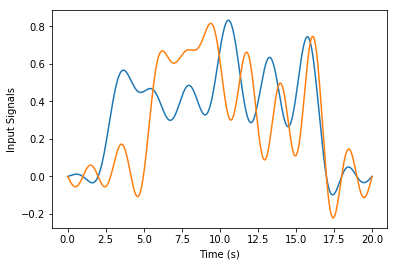

In [2]:
end_time = 20
sinc_padding = 3
delta_t = 1e-4
t = np.arange(0,end_time+delta_t, delta_t)
Omega = np.pi
seed = 0
np.random.seed(int(seed))

num_signals = 2
x = np.zeros((num_signals, len(t)))
x_param = []
for n in range(num_signals):
    x_param.append(bandlimitedSignal(Omega))
    x_param[-1].random(t, padding = sinc_padding)
    x[n,:] = x_param[-1].sample(t)
    
plt.figure()
plt.plot(t,x.T)
plt.xlabel('Time (s)')
plt.ylabel('Input Signals')

## Create a set of three time encoding machines to perform the sampling and use them to sample the input signals
First, we need to define the mixing matrix A, and the parameters of the machines, kappa, delta and b.
A timeEncoder object is used to perform the sampling, and the output is encapsulated in a spikeTimes object.

Text(0,0.5,'Spike Times of Channel 1')

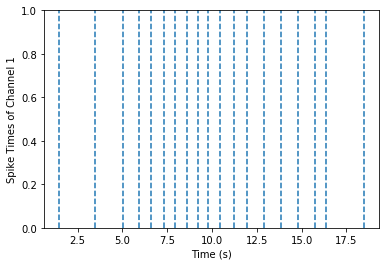

In [3]:
num_channels = 3
A = [[0.3,0.8],[-0.3,0.2],[0.4,0.6]]
kappa = [0.4,1.3,0.7]
delta = [0.7,0.6,0.5]
b = [0.2,0.9,0.4]

tem_mult = timeEncoder(kappa, delta, b, A)
spikes = tem_mult.encode_precise(x_param, Omega, end_time)

spikes_of_ch_1 = spikes.get_spikes_of(0)
plt.figure()
for s in spikes_of_ch_1:
    plt.axvline(s, linestyle='--')
plt.xlabel ('Time (s)')
plt.ylabel ('Spike Times of Channel 1')

## Reconstruction using recursive algorithm
The algorithm returns signals which are sampled at times t.

Text(0.5,0,'Time (s)')

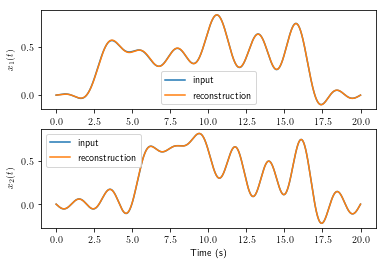

In [4]:
rec_mult = tem_mult.decode_recursive(spikes, t, x_param[0].get_sinc_locs(), Omega, delta_t, num_iterations = 100)

plt.figure()
plt.rc("text", usetex=True)

plt.subplot(2,1,1)
plt.plot(t, x[0,:], label = 'input')
plt.plot(t, rec_mult[0,:], label = 'reconstruction')
plt.legend(loc = 'best')
plt.ylabel(r'$x_1(t)$')

plt.subplot(2,1,2)
plt.plot(t, x[1,:], label = 'input')
plt.plot(t, rec_mult[1,:], label = 'reconstruction')
plt.ylabel(r'$x_2(t)$')
plt.legend(loc = 'best')
plt.xlabel("Time (s)")
    

0
1


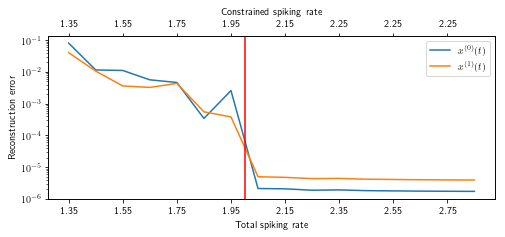

In [5]:
figure3_data_filename = "../Data/Figure3.pkl"

if(not os.path.isfile(figure3_data_filename)):
    Figure3.GetData()
Figure3.GenerateFigure()